# BAX422 Assignment 5
### Group 10: Yi Yin (Ian) Chen/Priyanka Malhotra/Sushma Niveni Pindiga

### 1. Data Exploration and Visualization (20) 
### - Explore Event_entry(in Files) dataset. 
### - Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features. 
### - Include any other plots you find interesting and provide brief interpretations.


In [72]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [73]:
# Import the CSV file
df = pd.read_csv('Event_entry.csv')

In [74]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


In [75]:
df.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


In [76]:
# NA counts
na_count = df.isnull().sum()
na_per = round((na_count/len(df))*100)
na_sum = pd.DataFrame({"NA_Count": na_count, "NA_Percentage": na_per, "Type": df.dtypes})
na_sum

,NA_Count,NA_Percentage,Type
Entry,0,0.0,int64
TicketClass,0,0.0,int64
Sex,0,0.0,object
Age,175,20.0,float64
Price,0,0.0,int64
Order,0,0.0,int64
Name,0,0.0,object
Ticket Number,0,0.0,int64
Bank Balance,0,0.0,int64


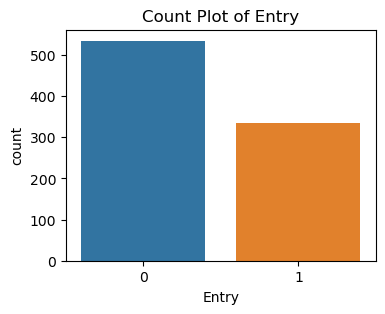

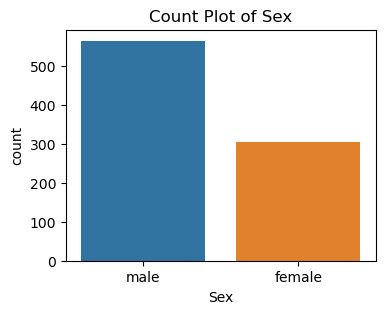

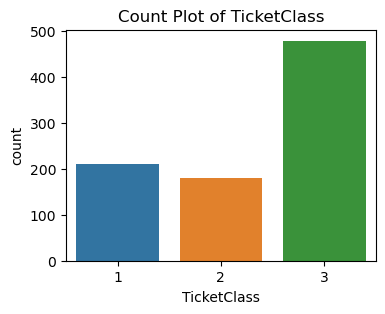

In [77]:
# Count plots for categorical data
x_vars = ['Entry', 'Sex', 'TicketClass']
for x in x_vars:
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df, x=x)
    plt.title(f"Count Plot of {x}")
    plt.show()

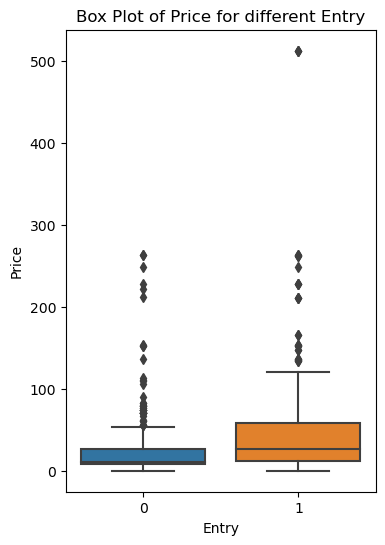

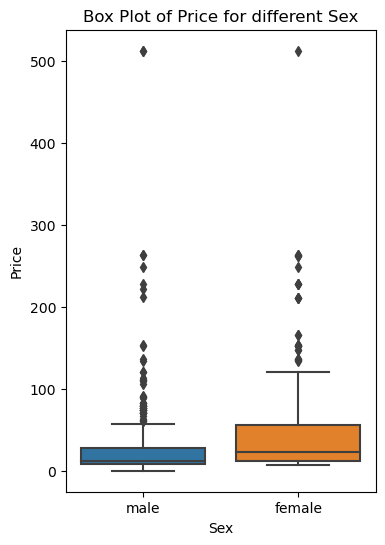

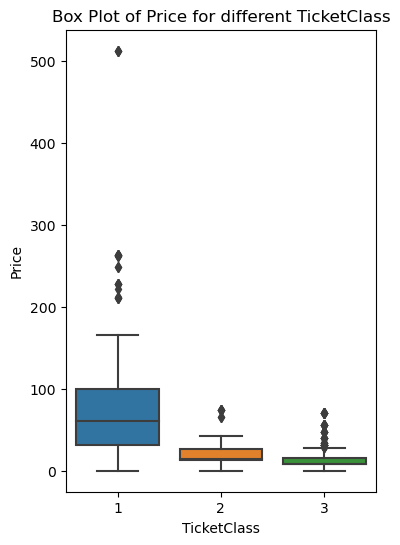

In [78]:
# Boxplot for categotical data on price
for x in x_vars:
    plt.figure(figsize=(4, 6))
    sns.boxplot(data=df, x=x, y='Price')
    plt.title(f"Box Plot of Price for different {x}")
    plt.show()

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


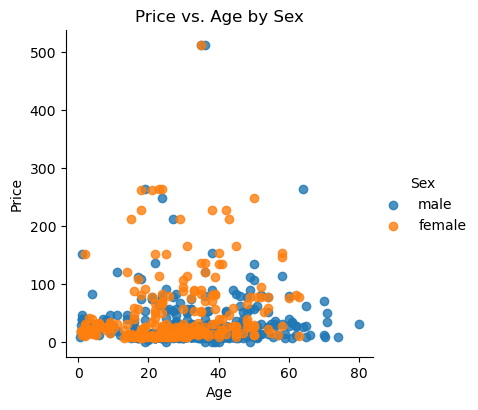

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


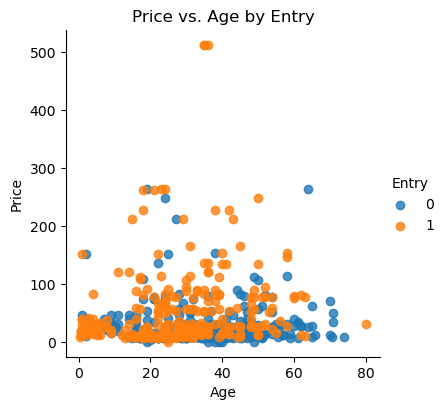

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


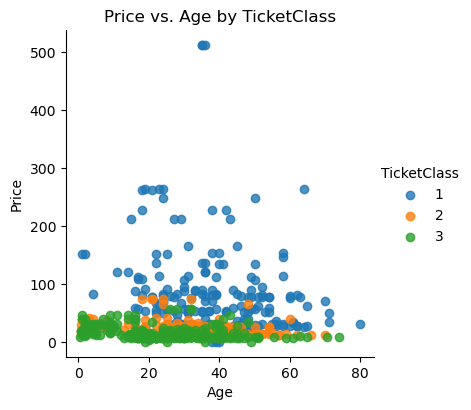

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


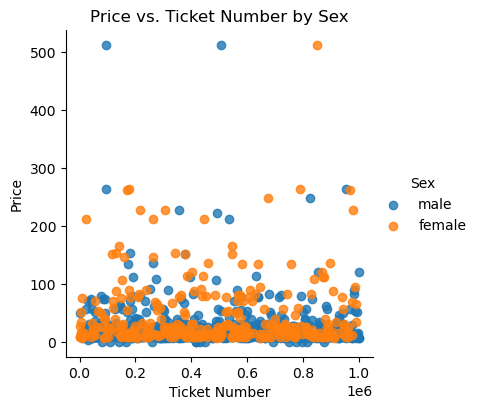

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


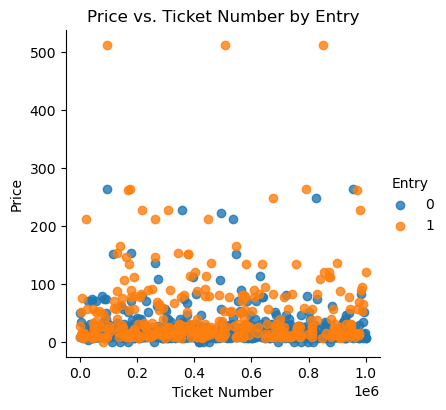

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


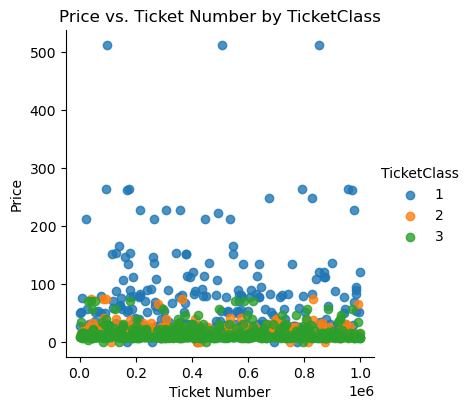

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


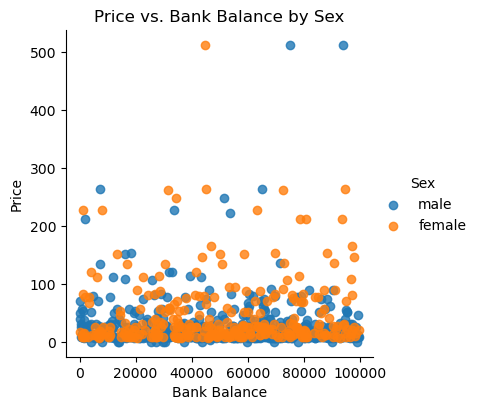

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


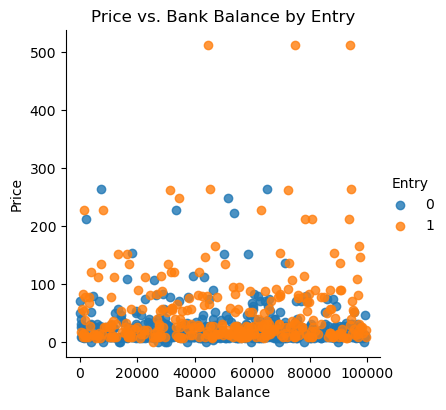

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


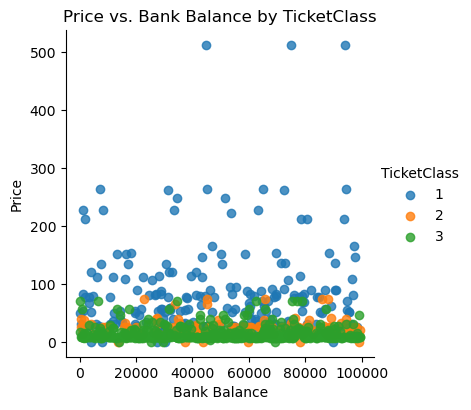

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


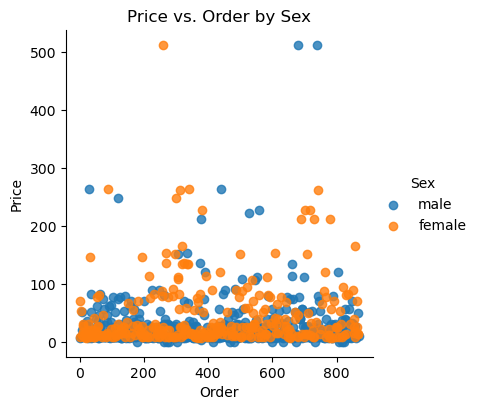

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


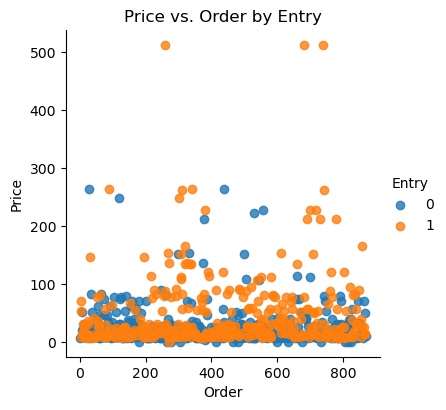

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


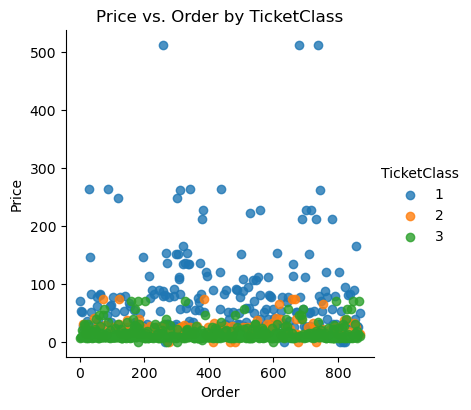

In [79]:
x_vars_2 = ['Age', 'Ticket Number', 'Bank Balance', 'Order']
y_var = 'Price'
hue_vars = ['Sex', 'Entry', 'TicketClass']


for x_var in x_vars_2:
    for hue in hue_vars:
        sns.lmplot(data=df, x=x_var, y=y_var, hue=hue, 
                height=4, aspect=1, scatter=True, fit_reg=False)
        plt.title(f'{y_var} vs. {x_var} by {hue}')
        plt.show()

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


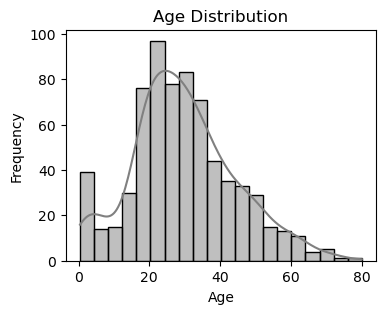

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


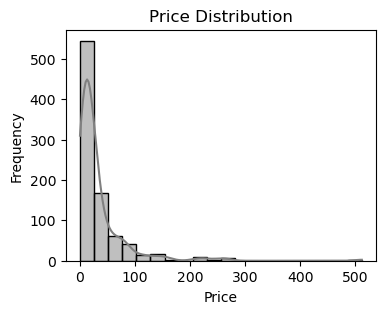

/Users/ianchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


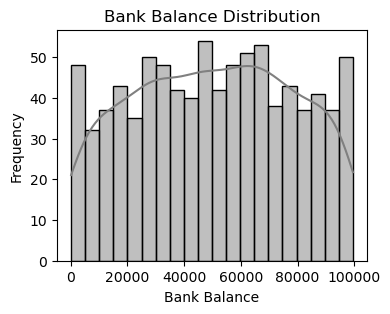

In [80]:
# hist for numerical data
numerical = ['Age', 'Price', 'Bank Balance']
for num in numerical:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[num], bins=20, kde=True, color='grey')
    plt.title(f"{num} Distribution")
    plt.xlabel(f"{num}")
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

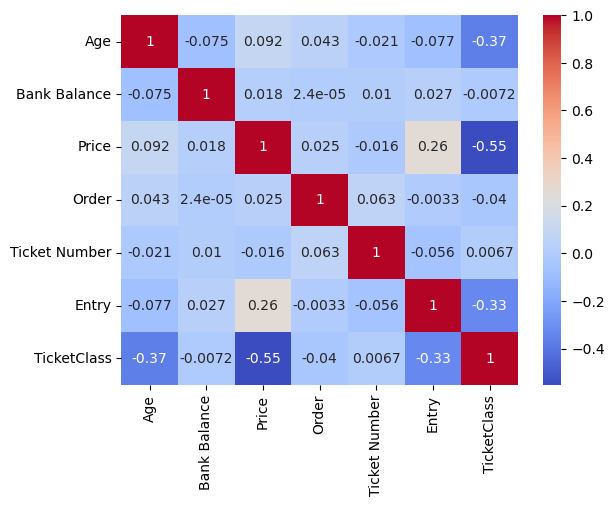

In [81]:
# corr matrix
sns.heatmap(df[['Age', 'Bank Balance', 'Price', 'Order', 'Ticket Number', 'Entry', 'TicketClass']].corr(), annot=True,  cmap='coolwarm')

### Insights from EDA

- Raw data had 9 variables and 869 observations

- Age feature had around 20% missing value (175 NAs)

- The Entry had around 60% to 40% proportion (0 to 1s)

- Male observations is around twice of Female

- Ticket Class 3 had drastically more observations than the other two

- On exploring the data, we found some outliers in the Price variable, further analysis found the extreme outliers lied in the ticket class 1 category

- No strong relationships were found in the scatter plots and the correlation matrix

- Mild relationships in ticket class vs entry and ticket class vs price

- Price is heavily right skwewed, possibly due to natural constraints

- Age slightly right skewed, also possibly due to the nature of the data

- Bank balance is near uniform

### 2. PCA Analysis (25): 
### - Split the dataset into training and testing sets and encode the variables if needed. 
### - Develop a Logistic regression model to predict If the entry to the event will be granted on not. (Use at least 6 dimensions) 
### - Use PCA to reduce dimensions, try with 2, 4, and 6 dimensions 
### - Use the above 2,4,6 dimensions to train and test the Logistic Regression Model and evaluate the impact it has on the performance. 
### - Compare the OOS performance with that of a LASSO Logistic Regression Model. 
### (Tip: Many times, PCA reduces accuracy but the computation is much lighter and that is the tradeoff you can consider while building models in real life)

In [82]:
# Encode categorical and drop uselesss columns

df_encoded = pd.get_dummies(df, columns=['TicketClass', 'Sex'], drop_first=True)

df_encoded = df_encoded.drop(columns=['Name', 'Order', 'Ticket Number'])


In [83]:
# Deal with missing age values

age_mean = df['Age'].mean()

df_encoded['Age'].fillna(age_mean, inplace=True)

In [84]:
# Check NA

df_encoded.isnull().sum()

Entry            0
Age              0
Price            0
Bank Balance     0
TicketClass_2    0
TicketClass_3    0
Sex_male         0
dtype: int64

In [85]:
# Split the dataset

X = df_encoded.drop(columns=['Entry'])

y = df_encoded['Entry']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 100)

In [86]:
# Logistic Regression Model

log_model = LogisticRegression(max_iter=10000)

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [87]:
# Evaluate model

y_preidct_log = log_model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_preidct_log)

print(f"Accuracy of logistic model: {accuracy_log}")

Accuracy of logistic model: 0.7586206896551724


In [88]:
# Calculate OOS R Squared

r_squared_log = r2_score(y_test, y_preidct_log)

print(f"R squared of logistic model: {r_squared_log}")

R squared of logistic model: -0.038068181818181834


In [89]:
# Calculate OOS RMSE

rmse_log = np.sqrt(mean_squared_error(y_test, y_preidct_log))

print(f"RMSE of logistic model: {rmse_log}")

RMSE of logistic model: 0.4913036844405175


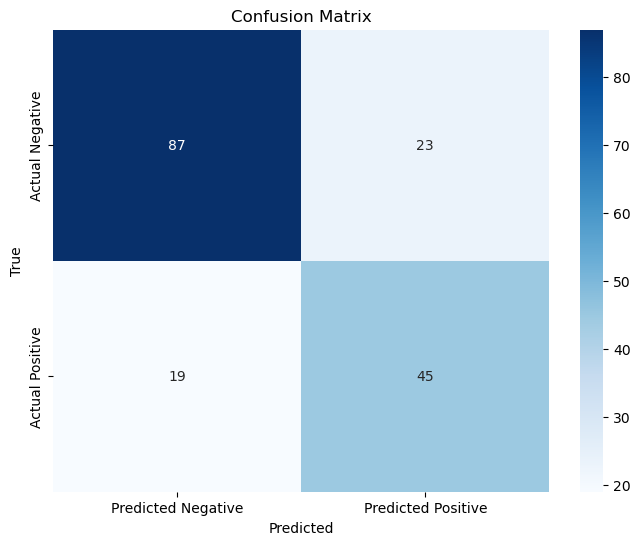

In [90]:
# Confusion Matrix

cm_log = confusion_matrix(y_test, y_preidct_log)

# Plot

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy with 2 dimensions PCA: 0.6609195402298851
R squared of 2 dimensions PCA: -0.4582386363636364
RMSE of 2 dimensions PCA: 0.5823061563903604
Explained Variance: 0.9999997912199393


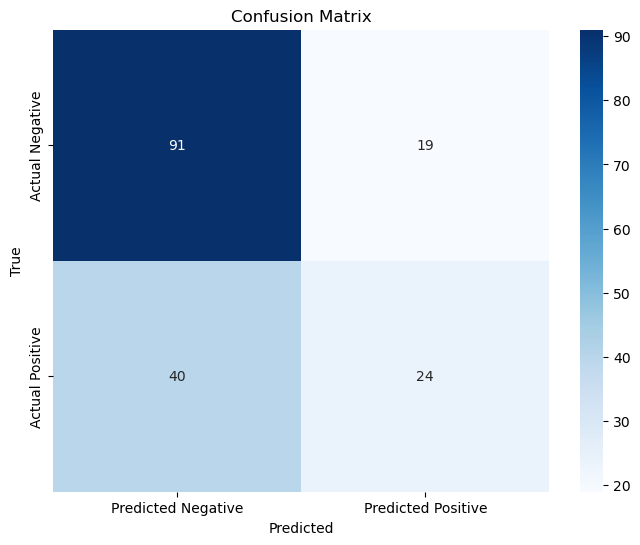

Accuracy with 4 dimensions PCA: 0.6954022988505747
R squared of 4 dimensions PCA: -0.3099431818181817
RMSE of 4 dimensions PCA: 0.5519037064102988
Explained Variance: 0.9999999996754623


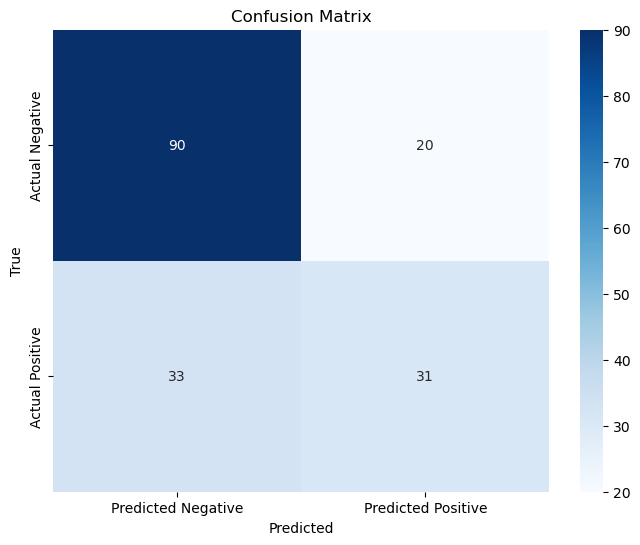

Accuracy with 6 dimensions PCA: 0.7586206896551724
R squared of 6 dimensions PCA: -0.038068181818181834
RMSE of 6 dimensions PCA: 0.4913036844405175
Explained Variance: 0.9999999999999999


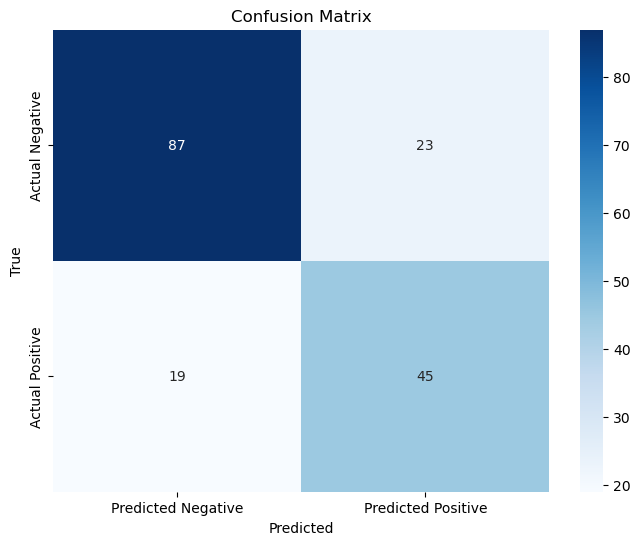

In [91]:
# Perform PCA
# Write a function to iterate through different dimension [2,4,6]
# Create a dictionary to score the scores

performance = {'Model':[], 'Accuracy':[], 'R_squared': [], 'RMSE': [], 'Explained Variance PCA': []}
def pca_log_accuracy(d):
    pca = PCA(n_components=d)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    log_pca_model = LogisticRegression(max_iter=10000)
    log_pca_model.fit(X_train_pca,y_train)
    y_predict_log_pca = log_pca_model.predict(X_test_pca)

    performance['Model'].append(f"{d} dimensions PCA model")

    accuracy_log_pca = accuracy_score(y_test, y_predict_log_pca)
    performance['Accuracy'].append(accuracy_log_pca)
    print(f"Accuracy with {d} dimensions PCA: {accuracy_log_pca}")

    r_squared_log_pca = r2_score(y_test, y_predict_log_pca)
    print(f"R squared of {d} dimensions PCA: {r_squared_log_pca}")
    performance['R_squared'].append(r_squared_log_pca)
    
    rmse_log_pca = np.sqrt(mean_squared_error(y_test, y_predict_log_pca))
    print(f"RMSE of {d} dimensions PCA: {rmse_log_pca}")
    performance['RMSE'].append(rmse_log_pca)

    explained_variance = pca.explained_variance_ratio_
    cummulative_variance = np.sum(explained_variance)
    print(f"Explained Variance: {cummulative_variance}")
    performance['Explained Variance PCA'].append(cummulative_variance)


    cm_log_pca = confusion_matrix(y_test, y_predict_log_pca)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_log_pca, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()


for i in [2, 4, 6]:
    pca_log_accuracy(i)

# Turn the perfomance into df
performance_df = pd.DataFrame(performance)

In [92]:
# Add in the logistic regression scores

log_performance = {
    'Model': 'Logistic Model',
    'Accuracy': accuracy_log,
    'R_squared': r_squared_log,
    'RMSE': rmse_log,
    'Explained Variance PCA': ''
}

log_performance_df = pd.DataFrame([log_performance])
performance_df = pd.concat([log_performance_df, performance_df], ignore_index=True)

performance_df

,Model,Accuracy,R_squared,RMSE,Explained Variance PCA
0,Logistic Model,0.758621,-0.038068,0.491304,
1,2 dimensions PCA model,0.660920,-0.458239,0.582306,1.0
2,4 dimensions PCA model,0.695402,-0.309943,0.551904,1.0
3,6 dimensions PCA model,0.758621,-0.038068,0.491304,1.0


In [93]:
# Run a simple Lasso
# Get the performances like past steps
# Create a pipeline with StandardScaler and LASSO Logistic Regression


lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso_logistic', LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, random_state=42))
])

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
r_squared_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

lasso_performance = {
    'Model': 'Lasso Model',
    'Accuracy': accuracy_lasso,
    'R_squared': r_squared_lasso,
    'RMSE': rmse_lasso,
    'Explained Variance PCA': ''
}

lasso_performance_df = pd.DataFrame([lasso_performance])

performance_df = pd.concat([lasso_performance_df, performance_df], ignore_index=True)

performance_df

,Model,Accuracy,R_squared,RMSE,Explained Variance PCA
0,Lasso Model,0.770115,0.011364,0.479463,
1,Logistic Model,0.758621,-0.038068,0.491304,
2,2 dimensions PCA model,0.660920,-0.458239,0.582306,1.0
3,4 dimensions PCA model,0.695402,-0.309943,0.551904,1.0
4,6 dimensions PCA model,0.758621,-0.038068,0.491304,1.0


### Insights and Explanation

- A general split of 8:2 of the data was performed

- Previously found missing values was dealt with, by filling with the mean age

- Encoding of categorical data was performed, I chose to use one-hot encoding

- Unnecessary columns such as order, name and ticket number were dropped, they either showed low correlations to entry or naturaly has no impact on outcome variables

- Looking at the comparison of all the models, we found that a simple logistic regression of 6 dimensions yielded the same results as we had 6 dimensions PCA model, the performacne metrics were the same

- Lower dimensions of the PCA models lost certain amount of accuracy, R squared and had higher RMSEs and more Type I and Type II errors

- Lasso yielded the best performance out of the all, performed better in all the metrics

### 3. Decision Tree Analysis (25)
### - Split the dataset into training and testing sets and encode the variables if needed.
### - Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.)
### - Explain the steps clearly that you took in preparing the data and developing the model, feel free to remove unnecessary columns.
### - Train the decision tree classifier using the training data.
### - Predict the accuracy of model using test data and explain the results.

In [94]:
# Dataset is already preprocessed 
# The steps were explained in the last question
# Develop the model by establishing a DecisionTreeClassifier from the tree package
# To test out the performance of different max_depths, write a function that can iterate through selected depths

dt_performance = {
    'Model': [],
    'Accuracy': [],
    'R_squared': [],
    'RMSE': [],
    'Explained Variance PCA': []
}


def dt_depth(n):
    dt_model = tree.DecisionTreeClassifier(max_depth=n)
    # Train the model
    dt_model.fit(X_train, y_train)
    # Evaluate model, same as previous questions

    y_predict_dt = dt_model.predict(X_test)

    dt_performance['Model'].append(f"Decision Tree Depth {n}")

    accuracy_dt = accuracy_score(y_test, y_predict_dt)
    dt_performance['Accuracy'].append(accuracy_dt)
    
    r_squared_dt = r2_score(y_test, y_predict_dt)
    dt_performance['R_squared'].append(r_squared_dt)

    rmse_dt = np.sqrt(mean_squared_error(y_test, y_predict_dt))
    dt_performance['RMSE'].append(rmse_dt)

    dt_performance['Explained Variance PCA'].append('')

In [95]:
# Iterate through a list of depths

depths = list(range(1,11))

for n in depths:
    dt_depth(n)

In [96]:
dt_performance_df = pd.DataFrame(dt_performance)

dt_performance_df

,Model,Accuracy,R_squared,RMSE,Explained Variance PCA
0,Decision Tree Depth 1,0.770115,0.011364,0.479463,
1,Decision Tree Depth 2,0.752874,-0.062784,0.497118,
2,Decision Tree Depth 3,0.793103,0.110227,0.454859,
3,Decision Tree Depth 4,0.798851,0.134943,0.448497,
4,Decision Tree Depth 5,0.770115,0.011364,0.479463,
5,Decision Tree Depth 6,0.781609,0.060795,0.467323,
6,Decision Tree Depth 7,0.787356,0.085511,0.461133,
7,Decision Tree Depth 8,0.787356,0.085511,0.461133,
8,Decision Tree Depth 9,0.787356,0.085511,0.461133,
9,Decision Tree Depth 10,0.752874,-0.062784,0.497118,


In [97]:
# It shows with depth of 4 having the best performance

dt_performance_df = dt_performance_df.iloc[3,].to_frame().transpose()

performance_df = pd.concat([performance_df, dt_performance_df], ignore_index=True)

In [98]:
performance_df

,Model,Accuracy,R_squared,RMSE,Explained Variance PCA
0,Lasso Model,0.770115,0.011364,0.479463,
1,Logistic Model,0.758621,-0.038068,0.491304,
2,2 dimensions PCA model,0.66092,-0.458239,0.582306,1.0
3,4 dimensions PCA model,0.695402,-0.309943,0.551904,1.0
4,6 dimensions PCA model,0.758621,-0.038068,0.491304,1.0
5,Decision Tree Depth 4,0.798851,0.134943,0.448497,


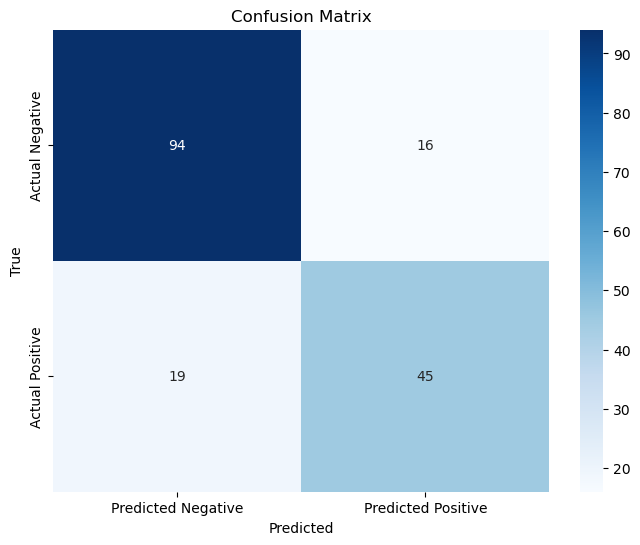

In [105]:
dt_model = tree.DecisionTreeClassifier(max_depth=4)

dt_model.fit(X_train, y_train)

y_predict_dt = dt_model.predict(X_test)

cm_dt = confusion_matrix(y_test, y_predict_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Insights and Explanation

- Preprocessing steps were explained in the last part

- Building the model, I set it up so that I can explore on the max_depths of the tree, to find the sweet spot between overfitting and performance

- The performance from the depths I tested showed that at depth 4, the decision tree model performed the best

- Comparing to the previous models, the decision tree model had even better performance, with a near 0.8 OOS accuracy

- Type I and Type II errors were lower too

### 4. K Means Clustering(30)
### - Use the Entry_event database and use the Age and Price columns only (drop all other columns)
### - Perform K means clustering for different values of K.
### - Draw a plot and figure out the appropriate value of K, explain in detail the reason for picking K value and the implications.
### - Create the clusters using the above value of K.
### - Plot a graph to show the different clusters.

In [99]:
# Pick the used columns and standardize

df_cluster = df_encoded[['Age','Price']]

print(df_cluster.isnull().sum())

scaler = StandardScaler()

df_cluster_scaled = scaler.fit_transform(df_cluster)
df_cluster_scaled = pd.DataFrame(df_cluster_scaled, columns=df_cluster.columns)

Age      0
Price    0
dtype: int64


In [ ]:
# List to store the KMeans models for each number of clusters
kmeans_models = []

# Loop over the range of cluster numbers and fit the KMeans model
for k in range(1, 201):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    kmeans_models.append(kmeans)

In [101]:
# Function to calculate KICs

def kic(model, criterion="A"):
    
    n, m = model.cluster_centers_.shape
    D = model.inertia_
    if criterion == "A":
        # Check for potential division by zero
        if n == m + 1:
            return np.inf
        else:
            return D + 2 * m * n * (n / (n - m - 1))
    elif criterion == "B":
        return D + np.log(n) * m * n
    else:
        raise ValueError("Invalid criterion. Choose 'A' or 'B'.")

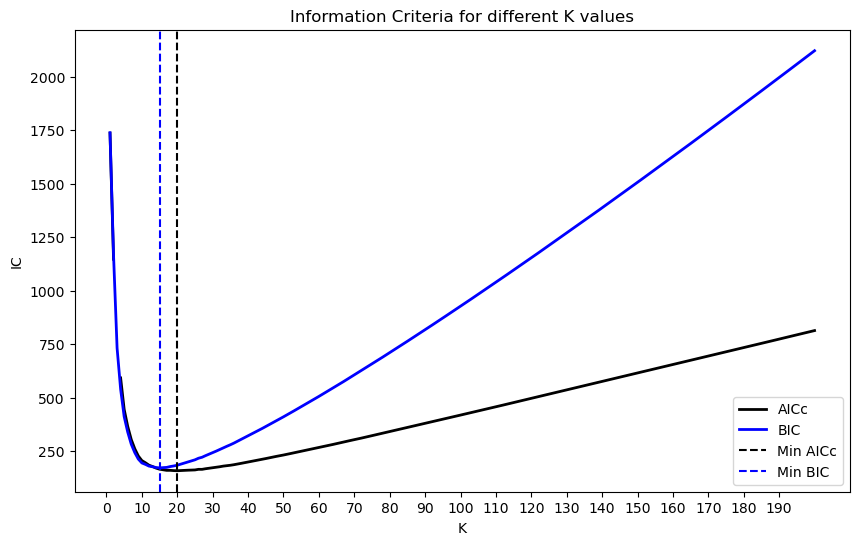

In [102]:
# Calculate AICc and BIC for each model
kaicc = [kic(model) for model in kmeans_models]
kbic = [kic(model, "B") for model in kmeans_models]

# Plot AICc and BIC
plt.figure(figsize=(10, 6))
plt.plot(range(1, 201), kaicc, label='AICc', color='black', linewidth=2)
plt.plot(range(1, 201), kbic, label='BIC', color='blue', linewidth=2)
plt.axvline(np.argmin(kaicc)+1, color='black', linestyle='--', label='Min AICc')
plt.axvline(np.argmin(kbic)+1, color='blue', linestyle='--', label='Min BIC')
plt.xticks(range(0, 200, 10))
plt.xlabel("K")
plt.ylabel("IC")
plt.title("Information Criteria for different K values")
plt.legend()
plt.show()

In [ ]:
# Elbow rule
deviances = [KMeans(n_clusters=k).fit(df_cluster_scaled).inertia_ for k in range(1, 201)]

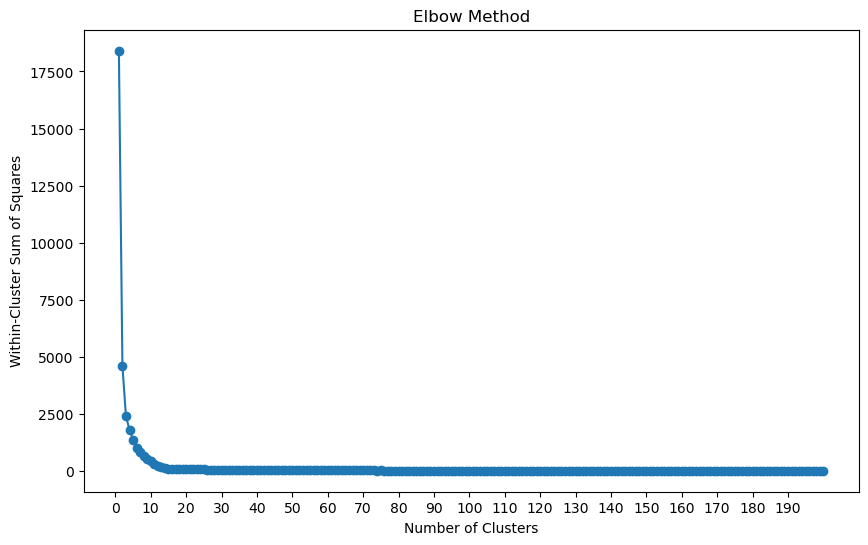

In [107]:
# Plot the deviances
plt.figure(figsize=(10, 6))
plt.plot(range(1, 201), deviances, marker='o', linestyle='-')
plt.title("Elbow Method")
plt.xticks(range(0, 200, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

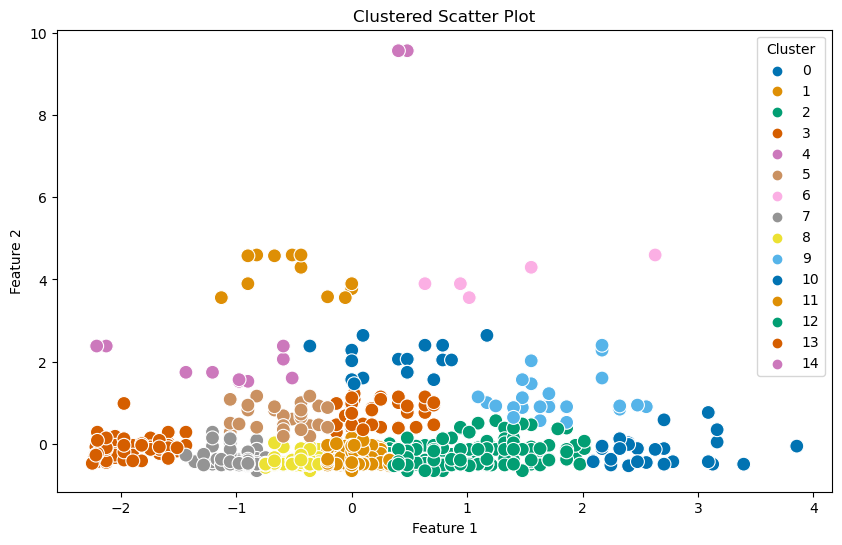

In [104]:
# From the previous two methods, we have a joint consensus to choose K=15
df_cluster_scaled['Cluster'] = kmeans_models[14].labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster_scaled, x='Age', y='Price', hue='Cluster', palette='colorblind', s=100)
plt.title('Clustered Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

### Insights and Explanation

- I used both the IC method and elbow rule to find the best K

- Both methods showed close results, BIC suggests K around 15, AICc suggests around 20

- Elbow showed K between 10 - 20

- I chose K = 15 after considering all analysis